In [43]:
import pandas as pd

smoking_data = pd.read_csv("../../data/smoking_by_age_and_gender.txt", sep="\t")
print(smoking_data.head())



     Age Gender  1974  1994  2004  2014
0  18-24    Men  42.1  29.8  25.6  18.5
1  25-34    Men  50.5  31.4  26.1  23.7
2  35-44    Men  51.0  33.2  26.5  22.0
3  45-54    Men  46.8  30.8  26.7  19.9
4  55-64    Men  37.7  24.7  22.7  18.8


## Using loc to select data

In [44]:
smoking_men_18_24_1974 = smoking_data.loc[
    (smoking_data['Gender'] == 'Men') & (smoking_data['Age'] == '18-24'),
    '1974'
].item()  # or use .values[0]

smoking_men_18_24_2014 = smoking_data.loc[
    (smoking_data['Gender'] == 'Men') & (smoking_data['Age'] == '18-24'),
    '2014'
].item()

absolute_change = smoking_men_18_24_2014 - smoking_men_18_24_1974
percent_change = (smoking_men_18_24_2014 - smoking_men_18_24_1974) / smoking_men_18_24_1974 * 100

print(f"Smoking rate dropped from {smoking_men_18_24_1974}% in 1974 to {smoking_men_18_24_2014}% in 2014.")
print(f"Absolute change: {absolute_change:.1f}%")
print(f"Percentage change: {percent_change:.1f}%")

Smoking rate dropped from 42.1% in 1974 to 18.5% in 2014.
Absolute change: -23.6%
Percentage change: -56.1%


Tracking a cohort though time

In [45]:
cohort_in_1974 = smoking_men_18_24_1974
cohort_in_1994 = smoking_data.loc[
    (smoking_data['Age'] == "35-44") & (smoking_data['Gender'] == 'Men'), 
    '1994'].item()
cohort_in_2014 = smoking_data.loc[
    (smoking_data['Age'] == "55-64") & (smoking_data['Gender'] == 'Men'), 
    '2014'].item()
print(cohort_in_1974)
print(cohort_in_1994)
print(cohort_in_2014)

absolute_change = cohort_in_2014 - cohort_in_1974
relative_change = (cohort_in_2014 - cohort_in_1974) / cohort_in_1974 * 100
print(absolute_change)
print(relative_change)


42.1
33.2
18.8
-23.3
-55.34441805225653


Compare men and women smoking rates over the years in the age-18-24 group

     Age Gender  Year  Percent Smokers
0  18-24    Men  1974             42.1
1  18-24  Women  1974             34.0
2  18-24    Men  1994             29.8
3  18-24  Women  1994             28.5
4  18-24    Men  2004             25.6


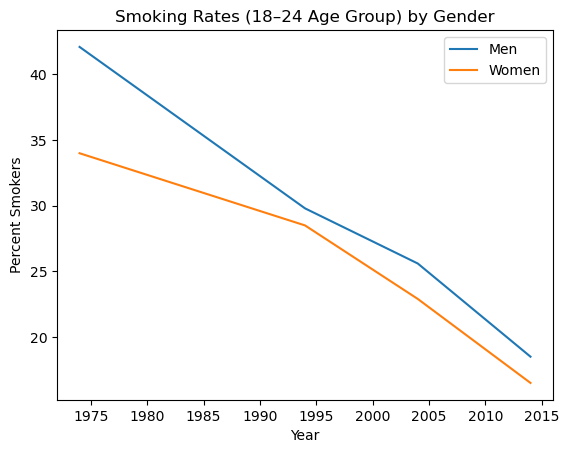

In [66]:
import matplotlib.pyplot as plt 
from matplotlib.figure import Figure
from matplotlib.axes import Axes

# Filter for men and women aged 18–24
subset = smoking_data[smoking_data['Age'] == '18-24']

# Convert wide to long format
long_df = subset.melt(id_vars=['Age', 'Gender'], var_name='Year', value_name='Percent Smokers')

# Convert Year to int if needed
long_df['Year'] = long_df['Year'].astype(int)

print(long_df.head())

fig: Figure = plt.figure()
ax: Axes = fig.add_subplot()

# Plot separately by gender
for gender, group in long_df.groupby('Gender'):
    ax.plot(group['Year'], group['Percent Smokers'], label=gender)

ax.set_xlabel('Year')
ax.set_ylabel('Percent Smokers')
ax.set_title('Smoking Rates (18–24 Age Group) by Gender')
ax.legend()
# smokers_women_18_24.plot(kind='line', x='Year', y='Smokers', ax=ax) 



